# Exploratory Data Analysis: Disney Reviews Dataset

This notebook provides a comprehensive analysis of the Disney reviews dataset containing 1,000 reviews from visitors to Disney locations.

## Dataset Overview
- **Source**: DisneylandReviews
- **Records**: 42,656 reviews
- **Columns**: Review_ID, Rating, Year_Month, Reviewer_Location, Review_Text, Branch
- **Purpose**: Understanding customer sentiment and patterns in Disney park reviews


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv("data/DisneylandReviews.csv", encoding='latin-1')


print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()


Dataset shape: (42656, 6)
Columns: ['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text', 'Branch']

First 5 rows:


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


# 1. Basic Data Information 

### basic information about the dataset

In [5]:
# Basic information about the dataset
print("Dataset Info:")
print("=" * 50)
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


### missing values 
we will see later on that this is not 100% the case

In [6]:
print("\n" + "=" * 50)
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64


### Unique values

In [9]:
print("\n" + "=" * 50)
print("Unique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique Values per Column:
Review_ID: 42636 unique values
Rating: 5 unique values
Year_Month: 112 unique values
Reviewer_Location: 162 unique values
Review_Text: 42632 unique values
Branch: 3 unique values


# 2. Data Analysis

In [30]:
initial_review_count = df.shape[0]
print(f"Initial review count: {initial_review_count}")

Initial review count: 42636


## 1. Remove duplicates 

In [31]:
df.drop_duplicates(inplace=True)
review_count_after_duplicates = df.shape[0]
print(f"After dropping duplicates: {review_count_after_duplicates}")

After dropping duplicates: 42636


## 2. reviews per review_id 

In [32]:
df.Review_ID.value_counts().head()

Review_ID
670801367    1
211026911    1
211017129    1
211014676    1
210996864    1
Name: count, dtype: int64

In [33]:
df[df.Review_ID==121615136]['Review_Text'].values

array(["What's there not to like about Disneyland, especially if your kids are happy! Even though I was there during a supposedly busy period (early Dec), the crowd was manageable and the queues were short. (Btw, I was there on a Thursday and Friday). About the only place that felt somewhat crowded was the new Toystoryland, but it could be because it was new and the place was small."],
      dtype=object)

We can see that the difference is in the review text. 
We want to keep the longest one, with the most informations, so let's create a new columns with the review size, and keep only the longest review per review id 

In [34]:
df['Review_Length'] = df['Review_Text'].apply(len)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Review_Length,Year,Month
0,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,291,2019,4
1,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,329,2019,4
2,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,335,2019,4
3,670721950,5,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,499,2019,3
4,670686565,4,2018-6,United Kingdom,I went to Disneyland Paris in April 2018 on Ea...,Disneyland_Paris,902,2018,6


In [35]:
df = df.loc[df.groupby('Review_ID')['Review_Length'].idxmax()]
review_count_after_review_id_duplicates = df.shape[0]
print(f"After keeping only the longest review per review id: {review_count_after_review_id_duplicates}")

After keeping only the longest review per review id: 42636


In [36]:
# Statistical summary
print("Statistical Summary:")
print("=" * 50)
df.describe(include='all')


Statistical Summary:


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Review_Length,Year,Month
count,4.263600e+04,42636.000000,42636,42636,42636,42636,42636.000000,42636.000000,42636.000000
unique,NaN,NaN,111,162,42624,3,NaN,NaN,NaN
top,NaN,NaN,2010-12,United States,I am a Hongkonger and an international travell...,Disneyland_California,NaN,NaN,NaN
freq,NaN,NaN,1308,14542,2,19400,NaN,NaN,NaN
mean,3.189353e+08,4.217680,NaN,NaN,NaN,NaN,697.030068,2014.691528,6.912398
std,1.657058e+08,1.063491,NaN,NaN,NaN,NaN,831.523863,2.216620,3.392566
min,1.398724e+06,1.000000,NaN,NaN,NaN,NaN,18.000000,2010.000000,1.000000
25%,1.744252e+08,4.000000,NaN,NaN,NaN,NaN,239.000000,2013.000000,4.000000
50%,2.908667e+08,5.000000,NaN,NaN,NaN,NaN,435.000000,2015.000000,7.000000
75%,4.489950e+08,5.000000,NaN,NaN,NaN,NaN,838.000000,2016.000000,10.000000


## 3. Rating Analysis

Rating Distribution:

Mean Rating: 4.22
Median Rating: 5.00
Mode Rating: 5


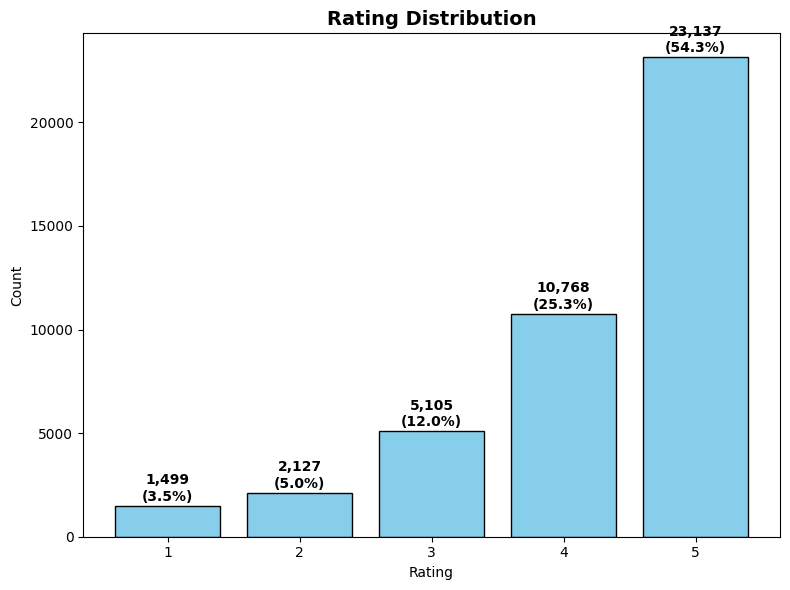

In [37]:
# Rating distribution
print("Rating Distribution:")
print("=" * 30)
rating_counts = df['Rating'].value_counts().sort_index()
print(f"\nMean Rating: {df['Rating'].mean():.2f}")
print(f"Median Rating: {df['Rating'].median():.2f}")
print(f"Mode Rating: {df['Rating'].mode()[0]}")

# Create rating distribution visualization
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

# Calculate percentages
total_reviews = len(df)
percentages = (rating_counts / total_reviews * 100).round(1)

# Bar plot
bars = ax1.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
ax1.set_title('Rating Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Add count and percentage labels on bars
for i, (bar, count, pct) in enumerate(zip(bars, rating_counts.values, percentages.values)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{count:,}\n({pct}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

## 4. Temporal Analysis
it is not sorted by date, so we need to sort it by review_id that are sorted 
bigger the review_id is, newer the review is

also, we can see that Year_Month has some missing values, so we need to fill them. 
How to : 
1. as we said, first order per timem so per review_id. lets do it from the most recent to the oldest one.
2. then if there is a missing value, we can to fill it with the previous value.

In [38]:
df[df.Year_Month=='missing'].shape[0]

0

In [39]:
df = df.sort_values(by='Review_ID', ascending=False)
df.reset_index(drop=True, inplace=True)


In [40]:
df['Year_Month'] = df['Year_Month'].replace('missing', np.nan)
df['Year_Month'] = df['Year_Month'].ffill()

In [41]:
df.sort_values(by='Review_ID', ascending=True).head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Review_Length,Year,Month
42635,1398724,5,2010-12,United States,Disnyeland has to be the BEST place to take a ...,Disneyland_California,4822,2010,12
42634,1506324,5,2010-12,United States,We take a long weekend trip to California each...,Disneyland_California,203,2010,12
42633,1534364,1,2010-12,United States,"never again...what a horrible experience, the ...",Disneyland_California,1080,2010,12
42632,1536786,4,2010-12,United Kingdom,"I went to the Disneyparis resort, in 1996, wit...",Disneyland_Paris,994,2010,12
42631,1540854,5,2010-12,United States,This is definitely the Happiest Place on Earth...,Disneyland_California,165,2010,12


In [42]:
# Convert Year_Month to datetime for better analysis
df['Year_Month_Date'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')
df['Year'] = df['Year_Month_Date'].dt.year
df['Month'] = df['Year_Month_Date'].dt.month
del df['Year_Month_Date']

print("Temporal Distribution:")
print("=" * 30)
print("Reviews by Year:")
year_counts = df['Year'].value_counts().sort_index()
# print(year_counts)

print("\nReviews by Month:")
month_counts = df['Month'].value_counts().sort_index()
# print(month_counts)

print("\nYear-Month combinations:")
year_month_counts = df['Year_Month'].value_counts().sort_index()
# print(year_month_counts.head(10))


Temporal Distribution:
Reviews by Year:

Reviews by Month:

Year-Month combinations:


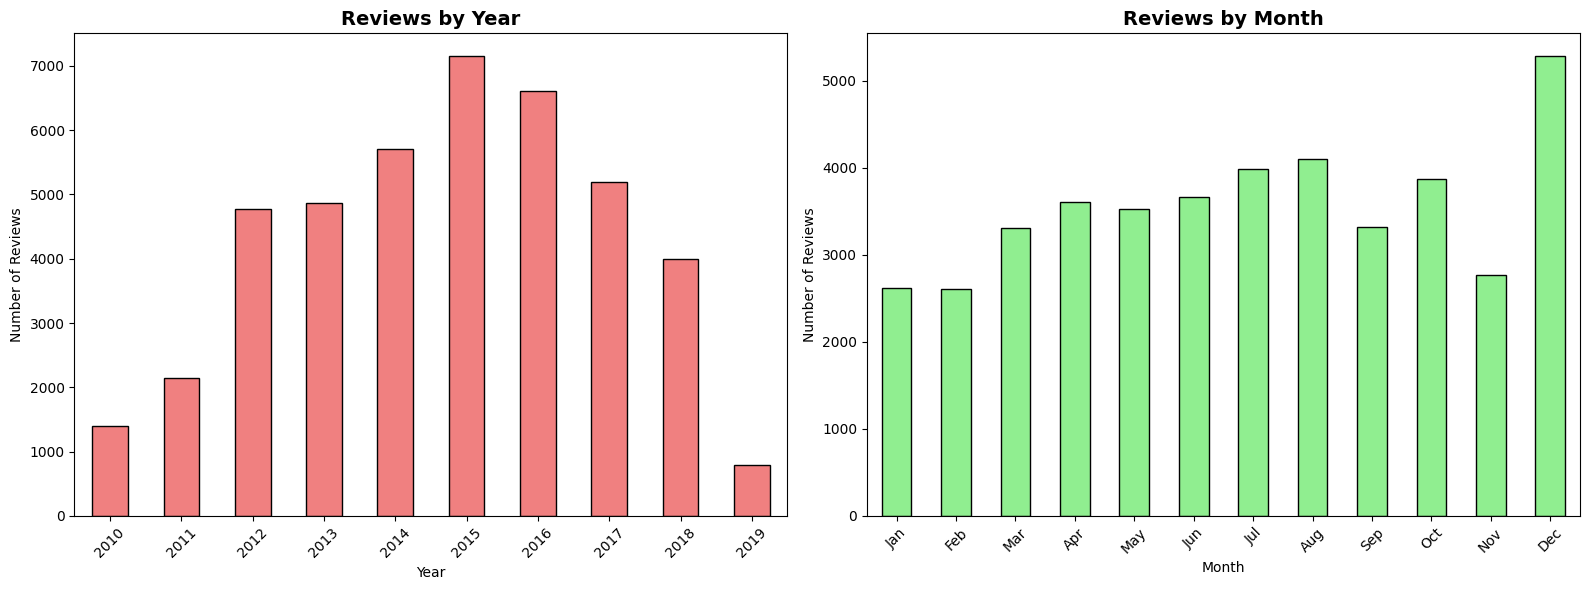

In [43]:
# Temporal visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Reviews by Year
year_counts.plot(kind='bar', ax=ax1, color='lightcoral', edgecolor='black')
ax1.set_title('Reviews by Year', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Reviews')
ax1.tick_params(axis='x', rotation=45)

# Reviews by Month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts.plot(kind='bar', ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Reviews by Month', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Reviews')
ax2.set_xticklabels([month_names[i-1] for i in month_counts.index], rotation=45)

plt.tight_layout()
plt.show()


## 5. Geographic Analysis

In [44]:
# Geographic distribution analysis
print("Geographic Distribution:")
print("=" * 30)
location_counts = df['Reviewer_Location'].value_counts()


print(f"Total unique locations: {df['Reviewer_Location'].nunique()}")

# Average rating by location (for locations with at least 5 reviews)
location_ratings = df.groupby('Reviewer_Location').agg({
    'Rating': ['mean', 'count']
}).round(2)
location_ratings.columns = ['Avg_Rating', 'Review_Count']
location_ratings = location_ratings[location_ratings['Review_Count'] >= 5].sort_values('Avg_Rating', ascending=False)



Geographic Distribution:
Total unique locations: 162


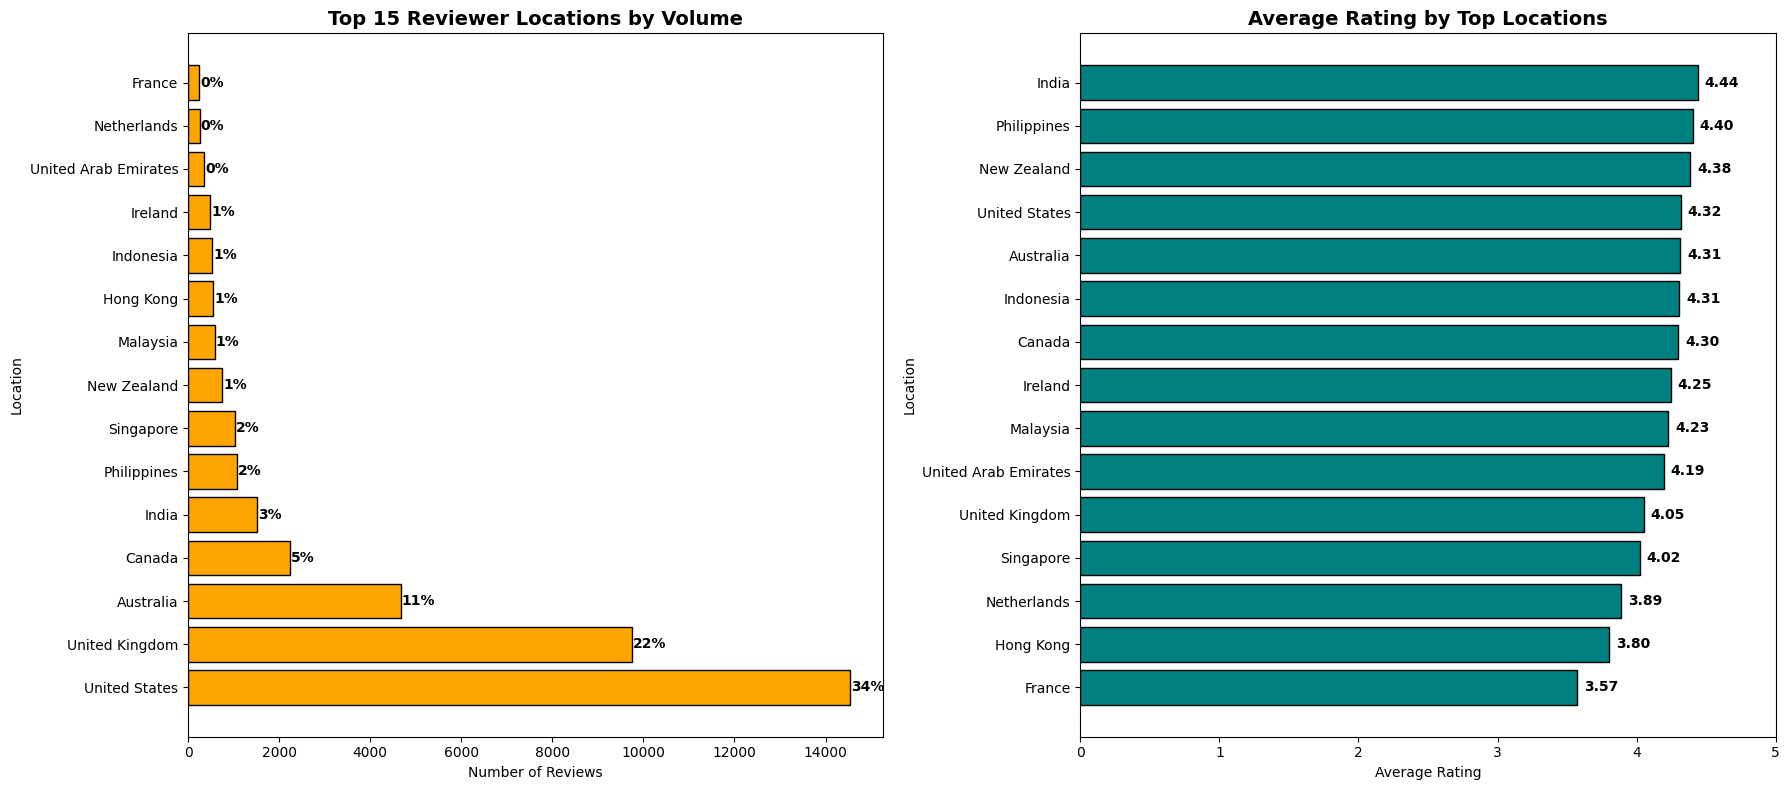

In [45]:
# Geographic visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 locations by review count
top_locations = location_counts.head(15)
total_reviews = len(df)

# Calculate percentages
percentages = (top_locations / total_reviews * 100).round(1)

# Create the horizontal bar plot
bars = ax1.barh(top_locations.index, top_locations.values, color='orange', edgecolor='black')
ax1.set_title('Top 15 Reviewer Locations by Volume', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Reviews')
ax1.set_ylabel('Location')

# Add percentage labels on the bars
for i, (bar, count, pct) in enumerate(zip(bars, top_locations.values, percentages.values)):
    ax1.text(bar.get_width() + 20, bar.get_y() + bar.get_height()/2, 
             f'{int(pct)}%', 
             ha='left', va='center', fontweight='bold', fontsize=10)

# Average rating by top locations
top_location_names = top_locations.index
top_location_ratings = df[df['Reviewer_Location'].isin(top_location_names)].groupby('Reviewer_Location')['Rating'].mean().sort_values(ascending=True)
bars2 = ax2.barh(top_location_ratings.index, top_location_ratings.values, color='teal', edgecolor='black')
ax2.set_title('Average Rating by Top Locations', fontsize=14, fontweight='bold')
ax2.set_xlabel('Average Rating')
ax2.set_ylabel('Location')
ax2.set_xlim(0, 5)

# Add rating values on the bars for the second plot
for i, (bar, rating) in enumerate(zip(bars2, top_location_ratings.values)):
    ax2.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{rating:.2f}', 
             ha='left', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


## 6. Text Analysis

In [46]:
# Text analysis
import re
from collections import Counter

# Calculate review length statistics
df['Review_Length'] = df['Review_Text'].str.len()
df['Word_Count'] = df['Review_Text'].str.split().str.len()

print("Text Statistics:")
print("=" * 30)
print(f"Average review length (characters): {df['Review_Length'].mean():.1f}")
print(f"Average word count: {df['Word_Count'].mean():.1f}")
print(f"Median review length (characters): {df['Review_Length'].median():.1f}")
print(f"Median word count: {df['Word_Count'].median():.1f}")

# print("\nReview length distribution:")
# print(df['Review_Length'].describe())

# print("\nWord count distribution:")
# print(df['Word_Count'].describe())


Text Statistics:
Average review length (characters): 697.0
Average word count: 129.7
Median review length (characters): 435.0
Median word count: 81.0


In [47]:
# Most common words analysis
def extract_words(text):
    """Extract words from text, removing punctuation and converting to lowercase"""
    if pd.isna(text):
        return []
    # Remove punctuation and convert to lowercase
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    # Filter out very short words
    return [word for word in words if len(word) > 2]

# Extract all words
all_words = []
for review in df['Review_Text']:
    all_words.extend(extract_words(review))

# Count word frequencies
word_freq = Counter(all_words)

# print("Most Common Words:")
# print("=" * 30)
# print("Top 30 most frequent words:")
# for word, count in word_freq.most_common(30):
#     print(f"{word}: {count}")


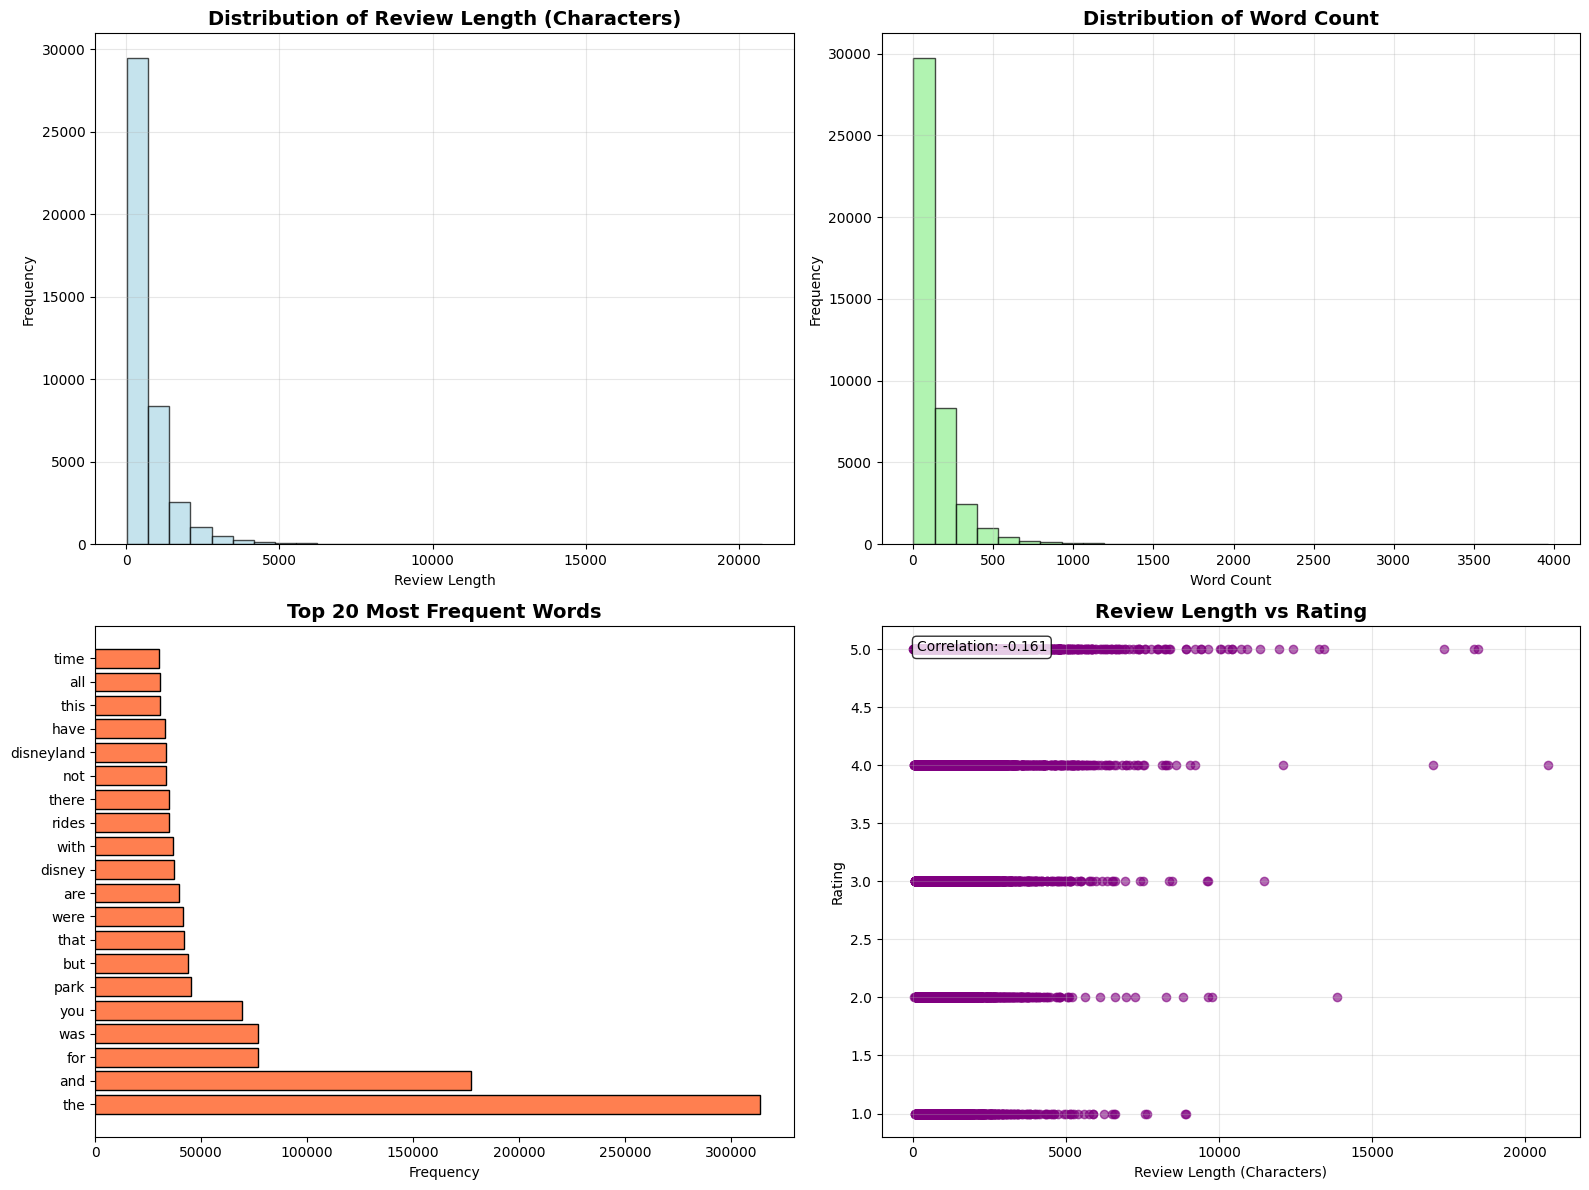

In [48]:
# Text visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Review length distribution
ax1.hist(df['Review_Length'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_title('Distribution of Review Length (Characters)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Review Length')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# Word count distribution
ax2.hist(df['Word_Count'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.set_title('Distribution of Word Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

# Top 20 most frequent words
top_words = dict(word_freq.most_common(20))
words = list(top_words.keys())
counts = list(top_words.values())
ax3.barh(words, counts, color='coral', edgecolor='black')
ax3.set_title('Top 20 Most Frequent Words', fontsize=14, fontweight='bold')
ax3.set_xlabel('Frequency')

# Review length vs Rating
ax4.scatter(df['Review_Length'], df['Rating'], alpha=0.6, color='purple')
ax4.set_title('Review Length vs Rating', fontsize=14, fontweight='bold')
ax4.set_xlabel('Review Length (Characters)')
ax4.set_ylabel('Rating')
ax4.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = df['Review_Length'].corr(df['Rating'])
ax4.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=ax4.transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


## 7. Branch Analysis - Disney Location Comparison


In [55]:
# Branch Analysis - Understanding Disney Locations
print("🏰 DISNEY BRANCH ANALYSIS")
print("=" * 60)

# Basic branch information
print("📍 Branch Distribution:")
branch_counts = df['Branch'].value_counts()
total_reviews = len(df)

for branch, count in branch_counts.items():
    percentage = (count / total_reviews * 100)
    print(f"   • {branch}: {count:,} reviews ({percentage:.1f}%)")

print(f"\n📊 Total unique branches: {df['Branch'].nunique()}")
print(f"📊 Total reviews across all branches: {total_reviews:,}")


🏰 DISNEY BRANCH ANALYSIS
📍 Branch Distribution:
   • Disneyland_California: 19,400 reviews (45.5%)
   • Disneyland_Paris: 13,629 reviews (32.0%)
   • Disneyland_HongKong: 9,607 reviews (22.5%)

📊 Total unique branches: 3
📊 Total reviews across all branches: 42,636


/var/folders/1q/r7t_r1xd12v8_2q0rc30_f040000gn/T/ipykernel_16794/2653620727.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


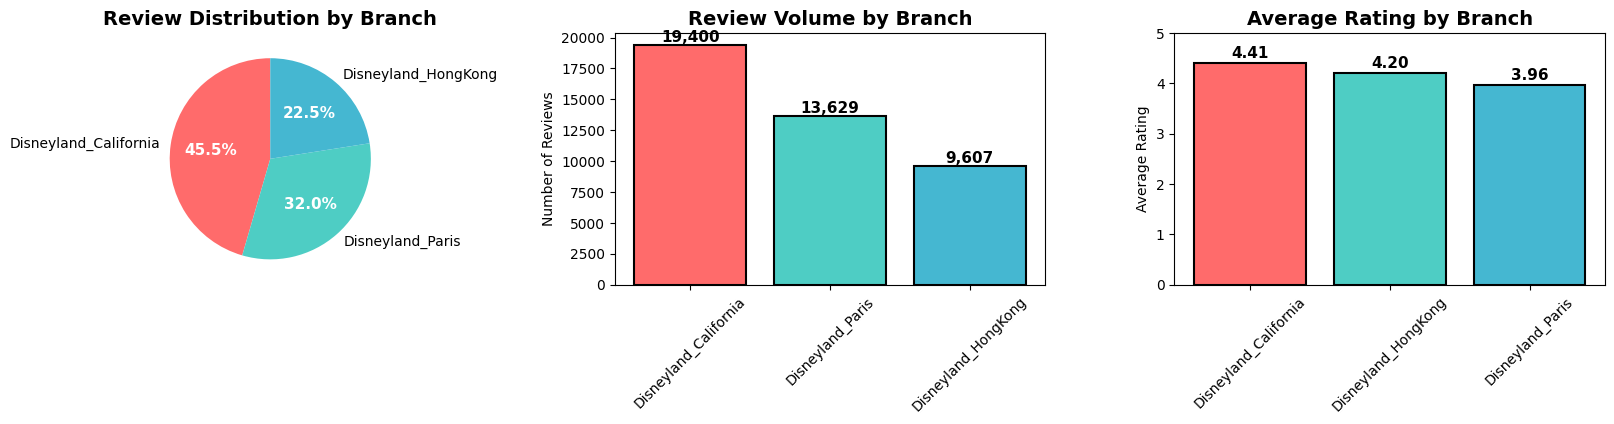

In [50]:
# Create comprehensive branch visualizations
fig = plt.figure(figsize=(20, 16))

# Create a 3x3 grid for comprehensive analysis
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# 1. Branch Review Volume (Pie Chart)
ax1 = fig.add_subplot(gs[0, 0])
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
wedges, texts, autotexts = ax1.pie(branch_counts.values, labels=branch_counts.index, 
                                   autopct='%1.1f%%', startangle=90, colors=colors[:len(branch_counts)])
ax1.set_title('Review Distribution by Branch', fontsize=14, fontweight='bold')

# Make percentage text bold and larger
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# 2. Branch Review Volume (Bar Chart)
ax2 = fig.add_subplot(gs[0, 1])
bars = ax2.bar(branch_counts.index, branch_counts.values, color=colors[:len(branch_counts)], 
               edgecolor='black', linewidth=1.5)
ax2.set_title('Review Volume by Branch', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Reviews')
ax2.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, count in zip(bars, branch_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3. Average Rating by Branch
ax3 = fig.add_subplot(gs[0, 2])
avg_ratings = df.groupby('Branch')['Rating'].mean().sort_values(ascending=False)
bars3 = ax3.bar(avg_ratings.index, avg_ratings.values, color=colors[:len(avg_ratings)], 
                edgecolor='black', linewidth=1.5)
ax3.set_title('Average Rating by Branch', fontsize=14, fontweight='bold')
ax3.set_ylabel('Average Rating')
ax3.set_ylim(0, 5)
ax3.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, rating in zip(bars3, avg_ratings.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{rating:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)


plt.tight_layout()
plt.show()


In [57]:
# 3. Geographic insights by branch
print(f"\n🌍 Geographic Insights by Branch:")
for branch in df['Branch'].unique():
    branch_df = df[df['Branch'] == branch]
    top_countries = branch_df['Reviewer_Location'].value_counts().head(5)
    total_branch_reviews = len(branch_df)
    
    print(f"\n📍 {branch} - Top 5 Countries:")
    for i, (country, count) in enumerate(top_countries.items(), 1):
        percentage = (count / total_branch_reviews * 100)
        avg_rating = branch_df[branch_df['Reviewer_Location'] == country]['Rating'].mean()
        print(f"   {i}. {country}: {count:,} reviews ({percentage:.1f}%) - Avg Rating: {avg_rating:.2f}")


🌍 Geographic Insights by Branch:

📍 Disneyland_California - Top 5 Countries:
   1. United States: 12,335 reviews (63.6%) - Avg Rating: 4.39
   2. Australia: 2,447 reviews (12.6%) - Avg Rating: 4.54
   3. Canada: 1,842 reviews (9.5%) - Avg Rating: 4.41
   4. United Kingdom: 1,019 reviews (5.3%) - Avg Rating: 4.29
   5. New Zealand: 527 reviews (2.7%) - Avg Rating: 4.49

📍 Disneyland_HongKong - Top 5 Countries:
   1. Australia: 1,634 reviews (17.0%) - Avg Rating: 4.21
   2. India: 1,082 reviews (11.3%) - Avg Rating: 4.51
   3. Philippines: 991 reviews (10.3%) - Avg Rating: 4.40
   4. United States: 877 reviews (9.1%) - Avg Rating: 4.15
   5. Singapore: 849 reviews (8.8%) - Avg Rating: 4.05

📍 Disneyland_Paris - Top 5 Countries:
   1. United Kingdom: 7,992 reviews (58.6%) - Avg Rating: 4.02
   2. United States: 1,330 reviews (9.8%) - Avg Rating: 3.74
   3. Australia: 595 reviews (4.4%) - Avg Rating: 3.65
   4. Ireland: 430 reviews (3.2%) - Avg Rating: 4.26
   5. India: 293 reviews (2.1%)

## 8. Summary

In [78]:
# Summary statistics for final insights - FULL DATASET ANALYSIS

# Calculate comprehensive dataset metrics
total_reviews = len(df)
unique_review_ids = df['Review_ID'].nunique()
duplicate_reviews = total_reviews - unique_review_ids
date_range_start = df['Year_Month'].min()
date_range_end = df['Year_Month'].max()



In [79]:
print(f"DATASET OVERVIEW:")
print(f"   • Total Reviews: {total_reviews:,} (Full Dataset)")
print(f"   • Unique Review IDs: {unique_review_ids:,}")
if duplicate_reviews > 0:
    print(f"   • Duplicate Reviews Removed: {duplicate_reviews:,}")
print(f"   • Date Range: {date_range_start} to {date_range_end} ({df['Year'].nunique()} years)")
print(f"   • Countries Represented: {df['Reviewer_Location'].nunique()}")
print(f"   • Disney Branches: {df['Branch'].nunique()} ({', '.join(df['Branch'].unique())})")



DATASET OVERVIEW:
   • Total Reviews: 42,636 (Full Dataset)
   • Unique Review IDs: 42,636
   • Date Range: 2010-10 to 2019-5 (10 years)
   • Countries Represented: 162
   • Disney Branches: 3 (Disneyland_California, Disneyland_HongKong, Disneyland_Paris)


In [69]:
print(f"\nRATING ANALYSIS:")
rating_mean = df['Rating'].mean()
rating_mode = df['Rating'].mode()[0]
rating_dist = dict(df['Rating'].value_counts().sort_index())
high_ratings = (df['Rating'] >= 4).sum()
high_rating_pct = (high_ratings / total_reviews * 100)

print(f"   • Average Rating: {rating_mean:.2f}/5.0")
print(f"   • Most Common Rating: {rating_mode} stars")
print(f"   • High Ratings (4-5 stars): {high_ratings:,} reviews ({high_rating_pct:.1f}%)")
print(f"   • Rating Distribution:")
for rating, count in rating_dist.items():
    percentage = (count / total_reviews * 100)
    print(f"     - {rating} stars: {count:,} reviews ({percentage:.1f}%)")




RATING ANALYSIS:
   • Average Rating: 4.22/5.0
   • Most Common Rating: 5 stars
   • High Ratings (4-5 stars): 33,905 reviews (79.5%)
   • Rating Distribution:
     - 1 stars: 1,499 reviews (3.5%)
     - 2 stars: 2,127 reviews (5.0%)
     - 3 stars: 5,105 reviews (12.0%)
     - 4 stars: 10,768 reviews (25.3%)
     - 5 stars: 23,137 reviews (54.3%)


In [70]:
print(f"\nGEOGRAPHIC INSIGHTS:")
top_5_countries = df['Reviewer_Location'].value_counts().head(5)
print(f"   • Top 5 Review Sources:")
for i, (country, count) in enumerate(top_5_countries.items(), 1):
    percentage = (count / total_reviews * 100)
    print(f"     {i}. {country}: {count:,} reviews ({percentage:.1f}%)")




GEOGRAPHIC INSIGHTS:
   • Top 5 Review Sources:
     1. United States: 14,542 reviews (34.1%)
     2. United Kingdom: 9,751 reviews (22.9%)
     3. Australia: 4,676 reviews (11.0%)
     4. Canada: 2,234 reviews (5.2%)
     5. India: 1,510 reviews (3.5%)


In [71]:
print(f"\nBRANCH ANALYSIS:")
branch_stats = df.groupby('Branch').agg({
    'Rating': ['count', 'mean'],
    'Reviewer_Location': 'nunique'
}).round(2)
branch_stats.columns = ['Review_Count', 'Avg_Rating', 'Countries']

for branch in df['Branch'].unique():
    branch_data = branch_stats.loc[branch]
    branch_pct = (branch_data['Review_Count'] / total_reviews * 100)
    print(f"   • {branch}:")
    print(f"     - Reviews: {branch_data['Review_Count']:,} ({branch_pct:.1f}%)")
    print(f"     - Avg Rating: {branch_data['Avg_Rating']:.2f}/5.0")
    print(f"     - Countries: {branch_data['Countries']}")




BRANCH ANALYSIS:
   • Disneyland_California:
     - Reviews: 19,400.0 (45.5%)
     - Avg Rating: 4.41/5.0
     - Countries: 111.0
   • Disneyland_HongKong:
     - Reviews: 9,607.0 (22.5%)
     - Avg Rating: 4.20/5.0
     - Countries: 117.0
   • Disneyland_Paris:
     - Reviews: 13,629.0 (32.0%)
     - Avg Rating: 3.96/5.0
     - Countries: 133.0


In [72]:
print(f"\nTEMPORAL PATTERNS:")
# Peak analysis
peak_month = df.groupby('Year_Month').size().idxmax()
peak_count = df.groupby('Year_Month').size().max()
most_active_year = df['Year'].value_counts().idxmax()
year_counts = df['Year'].value_counts().sort_index()

print(f"   • Peak Review Month: {peak_month} ({peak_count:,} reviews)")
print(f"   • Most Active Year: {most_active_year} ({year_counts[most_active_year]:,} reviews)")
print(f"   • Year Range: {year_counts.index.min()} - {year_counts.index.max()}")




TEMPORAL PATTERNS:
   • Peak Review Month: 2010-12 (1,308 reviews)
   • Most Active Year: 2015 (7,148 reviews)
   • Year Range: 2010 - 2019


In [74]:
print(f"\nTEXT ANALYSIS:")
avg_length = df['Review_Length'].mean()
avg_words = df['Word_Count'].mean()
length_rating_corr = df['Review_Length'].corr(df['Rating'])

print(f"   • Average Review Length: {avg_length:.0f} characters")
print(f"   • Average Word Count: {avg_words:.0f} words")
print(f"   • Length Range: {df['Review_Length'].min():.0f} - {df['Review_Length'].max():,.0f} characters")
print(f"   • Length-Rating Correlation: {length_rating_corr:.3f}")




TEXT ANALYSIS:
   • Average Review Length: 697 characters
   • Average Word Count: 130 words
   • Length Range: 18 - 20,756 characters
   • Length-Rating Correlation: -0.161


In [75]:
print(f"\nKEY TAKEAWAYS:")
print(f"   • Overall sentiment is {'POSITIVE' if rating_mean >= 4 else 'MIXED' if rating_mean >= 3 else 'NEGATIVE'} ({rating_mean:.2f}/5.0)")
print(f"   • {high_rating_pct:.1f}% of visitors gave 4-5 star ratings")
print(f"   • Global reach with visitors from {df['Reviewer_Location'].nunique()} countries")




KEY TAKEAWAYS:
   • Overall sentiment is POSITIVE (4.22/5.0)
   • 79.5% of visitors gave 4-5 star ratings
   • Global reach with visitors from 162 countries


In [76]:
# Branch performance
branch_with_highest_rating = df.groupby('Branch')['Rating'].mean().idxmax()
highest_avg_rating = df.groupby('Branch')['Rating'].mean().max()
branch_with_lowest_rating = df.groupby('Branch')['Rating'].mean().idxmin()
lowest_avg_rating = df.groupby('Branch')['Rating'].mean().min()

print(f"   • Highest rated: {branch_with_highest_rating} ({highest_avg_rating:.2f}/5.0)")
print(f"   • Lowest rated: {branch_with_lowest_rating} ({lowest_avg_rating:.2f}/5.0)")
print(f"   • Dataset spans {df['Year'].nunique()} years across {df['Branch'].nunique()} Disney locations")

   • Highest rated: Disneyland_California (4.41/5.0)
   • Lowest rated: Disneyland_Paris (3.96/5.0)
   • Dataset spans 10 years across 3 Disney locations
